In [2]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
# from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
import tensorflow as tf
%matplotlib inline

print(tf.__version__)
np.random.seed(1) # 设置一个种子保证结果的一致性

2.3.0


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1]]
(2, 400)
(1, 400)
400


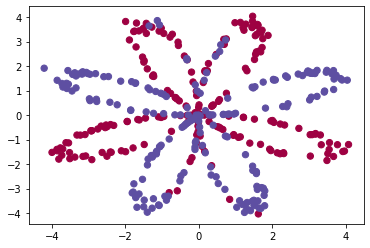

In [3]:
X,Y = load_planar_dataset()
print(Y)
shape_X = X.shape
shape_Y = Y.shape
m = shape_X[1]
print(X.shape)
print(Y.shape)
print(m)

plt.scatter(X[0,:],X[1,:],c=np.squeeze(Y),s=40,cmap=plt.cm.Spectral)

测试的精度为：0.470000


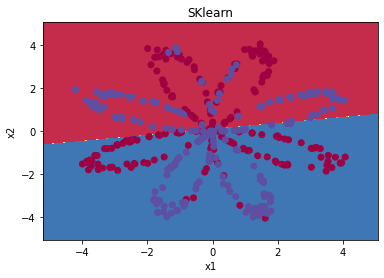

In [3]:
# 创建一个线性的逻辑回归模型
clf = sklearn.linear_model.LogisticRegressionCV()
#训练该模型
clf.fit(X.T,Y.T)
# 
plot_decision_boundary(lambda  x:clf.predict(x),X,np.squeeze(Y))
plt.title("SKlearn")

LR_predictions = clf.predict(X.T)
acc = float(np.sum(LR_predictions==Y))/float(Y.size)
print("测试的精度为：%f" % acc)

## ANN 两层网络

### 导入数据

In [3]:
X,Y = load_planar_dataset()

print(X.shape)
print(Y.shape)
# print(Y)

(2, 400)
(1, 400)


### 模型创建



In [14]:
input_num = X.shape[0]
n_hint = 4
n_y = Y.shape[0]
w1 = tf.Variable(tf.random.truncated_normal(shape=([n_hint,input_num]),dtype=tf.float32))
b1 = tf.Variable(tf.zeros(shape=([n_hint,1])))
w2 = tf.Variable(tf.random.truncated_normal(shape=([1,n_hint]),dtype=tf.float32))
b2 = tf.Variable(tf.zeros(shape=([1,1])))


class annModle():
    def __init__(self,input_num,n_hint):
        # self.w1 = tf.Variable(tf.random.normal(shape=([n_hint,input_num])))
        # self.b1 = tf.Variable(tf.zeros(shape=([n_hint,1])))
        # self.w2 = tf.Variable(tf.random.normal(shape=([1,n_hint])))
        # self.b2 = tf.Variable(tf.zeros(shape=([1,1])))

        # self.input_num = input_num
        # self.n_hint = n_hint
        
        pass

    # # 模型的创建，两层网络
    # def __call__(self,x):
    #     Z1 = self.w1@x+self.b1
    #     A1 = tf.tanh(Z1)
    #     Z2 = self.w2@A1+self.b2
    #     A2 = tf.sigmoid(Z2)
    #     return A2

    # 模型的创建，两层网络
    def __call__(self,x):
        Z1 = w1@x+b1
        A1 = tf.tanh(Z1)
        Z2 = w2@A1+b2
        A2 = tf.sigmoid(Z2)
        return A2

    def loss_func(self,y_true,y_pred):
        eps = 1e-7
        #将预测值限制在 1e-7 以上, 1 - 1e-7 以下，避免log(0)错误
        y_pred = tf.clip_by_value(y_pred,eps,1.0-eps)
        # tf.print(y_pred)
        # 交叉熵损失函数计算
        bec = -y_true*tf.math.log(y_pred)-(1-y_true)*tf.math.log(1-y_pred)
        tf.print(bec)
        cross_loss =tf.reduce_mean(bec)
        return cross_loss

    

model = annModle(X.shape[0],4)

In [22]:
Z1 = model.w1@X+model.b1
tf.print(model.w1)
print(Z1.shape)
Z2 = model.w2@Z1+model.b2
print(Z2.shape)

[[0.793211 0.0199371092]
 [-0.0130232163 0.0458465591]
 [-1.4749912 -0.596031189]
 [-1.96841168 -0.365706891]]
(4, 400)
(1, 400)


In [15]:
# 训练模型

epochs = 10
lr = 0.1

for epoch in range(epochs):

    with tf.GradientTape() as gt:
        y_pred = model(X)
       
        loss = model.loss_func(Y,y_pred)

    # loss_dw1,loss_db1,loss_dw2,loss_db2 = gt.gradient(loss,[model.w1,model.b1,model.w2,model.b2])
    loss_dw1,loss_db1,loss_dw2,loss_db2 = gt.gradient(loss,[w1,b1,w2,b2])
    
    tf.print(loss_dw1)

    if epoch % 1 == 0:
        tf.print(epoch,":",loss)
        tf.print(y_pred.shape)
        tf.print(w1)

    # model.w1.assign(model.w1-lr*loss_dw1)
    # model.b1.assign(model.b1-lr*loss_db1)
    # model.w2.assign(model.w2-lr*loss_dw2)
    # model.b2.assign(model.b2-lr*loss_db2)

    w1.assign(w1-lr*loss_dw1)
    b1.assign(b1-lr*loss_db1)
    w2.assign(w2-lr*loss_dw2)
    b2.assign(b2-lr*loss_db2)



[[0.423332334 0.748155594 0.737021565 ... -212.835068 -157.559647 -268.051971]]
[[0.673974 -10.6247425]
 [2.12084031 7.33801699]
 [-3.35759878 8.64917]
 [-0.365568 2.99546027]]
0 : -87.059967
TensorShape([1, 400])
[[-0.652174056 -0.375792146]
 [-0.696826518 0.417758077]
 [-1.38634765 -0.862820446]
 [1.29106438 0.125181884]]
[[0.0168999694 0.00027481516 0.000275888335 ... -1060.43835 -2092.49438 -1067.24756]]
[[10.1104546 -9.82635403]
 [-5.80709457 0.0901551545]
 [21.1840172 -22.6380844]
 [1.10329592 1.594661]]
1 : -893.127441
TensorShape([1, 400])
[[-0.719571471 0.686682105]
 [-0.908910573 -0.316043645]
 [-1.05058777 -1.72773743]
 [1.32762122 -0.17436415]]
[[1.1920929e-07 1.1920929e-07 1.1920929e-07 ... -4110.11426 -4110.11426 -4110.11426]]
[[0 0]
 [0 0]
 [0 0]
 [0 0]]
2 : -2055.05762
TensorShape([1, 400])
[[-1.73061693 1.66931748]
 [-0.328201115 -0.325059175]
 [-3.16898966 0.536071062]
 [1.21729159 -0.333830237]]
[[1.1920929e-07 1.1920929e-07 1.1920929e-07 ... -4110.11426 -4110.11426 